In [2]:
import pandas as pd 
import numpy as np 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

Divide it into several dataframes by books 

In [3]:
train = pd.read_csv("Datasets\Religious_text_train.csv")
chapters = np.array(train.iloc[:,0])
words = np.array(train.columns)

In [4]:
# book name changer 
# ex: Buddhism_Ch1
train[['book', 'chapter']] = train.iloc[:,0].str.split('_',expand=True)
train = train.drop(columns='Unnamed: 0')


In [5]:
book_names = list(train.book.unique())
book_names

['Buddhism',
 'TaoTeChing',
 'Upanishad',
 'YogaSutra',
 'BookOfProverb',
 'BookOfEcclesiastes',
 'BookOfEccleasiasticus',
 'BookOfWisdom']

In [6]:
books = dict()
chapter_counts = dict()
for book in book_names:
    books[book] = train[train.book == book].drop(columns=['book'])
    chapter_counts[book] = books[book].shape[0]


In [7]:
# there should be 590 chapters, and 8264 words + 'book' and 'columns'
train.shape

(590, 8266)

General Trend Investigation 
* word count over all 
* top word by book 
* word distribution over chapter (by %) 


In [8]:
# for future plot
mpl.rcParams.update({'axes.facecolor': 'white',   
                     'text.color' : "black",
                     'axes.labelcolor' : "black",
                     'xtick.color': 'white', 
                     'ytick.color': 'white',
                     'figure.figsize': (20, 10)
                     })

Plot the overall word count

shall           1168
man              846
thy              645
one              473
things           468
                ... 
toughness          1
principal          1
allconscious       1
diversities        1
occurs             1
Length: 8264, dtype: int64


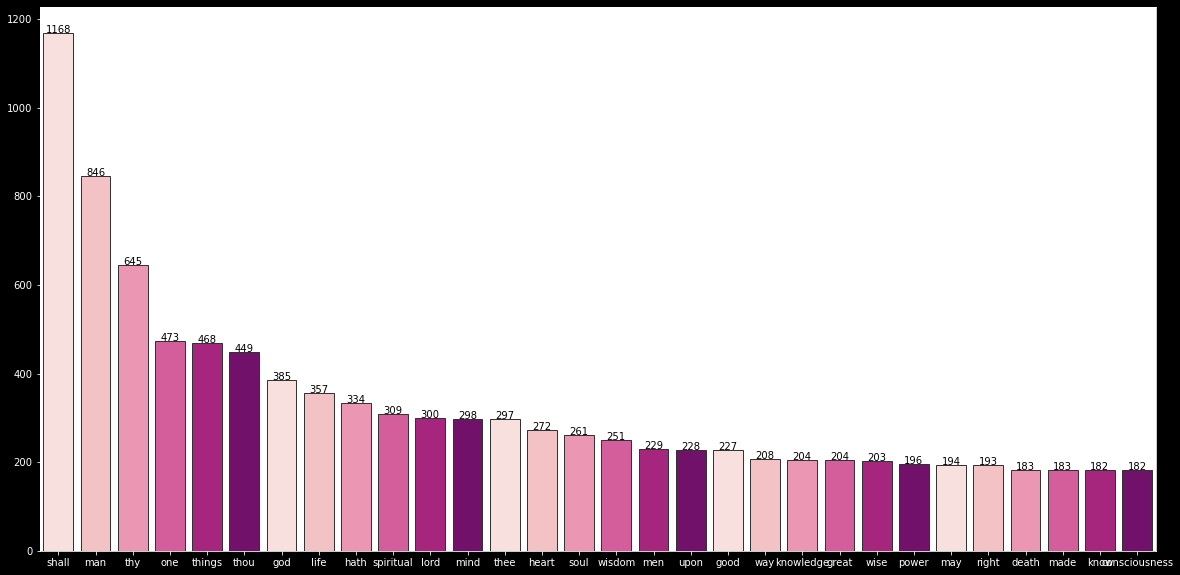

In [9]:
no_book = train.drop(["book", 'chapter'], axis=1)
all_words = no_book.sum().sort_values(ascending=False)
print(all_words)
ax1 = sns.barplot(x = all_words.index[:30], y = all_words[:30], palette=sns.color_palette("RdPu"), linewidth=1, edgecolor='.2')

count = 0
for index, item in all_words[:30].iteritems():
    ax1.text(count, item, item, color='black', ha="center")
    count+=1



Top word by book 

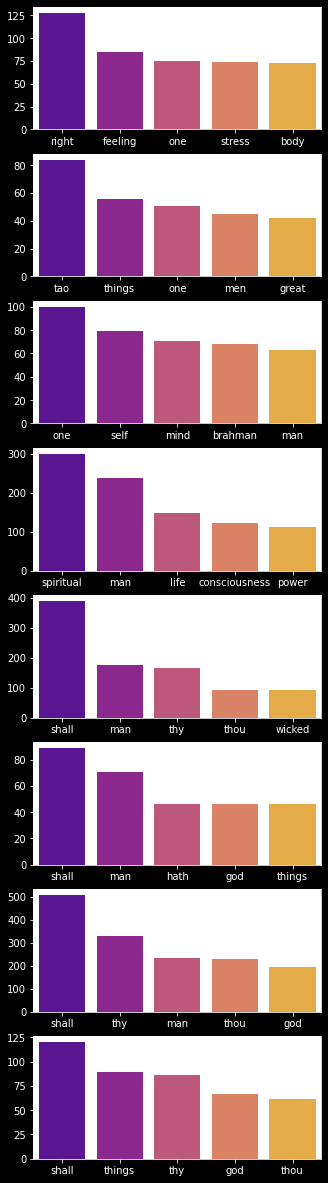

In [26]:
index = 1
for book in book_names: 
    table = train[train['book'] == book].drop(columns=['chapter', 'book']).sum(axis=0).sort_values(ascending=False)[:5]
    plt.subplot(8,1,index)
    plt.subplots_adjust(left=-0.1, right=0.1, bottom=-0.8, top = 0.8)
    sns.barplot(x=table.index, y=table, palette='plasma')
    
    index+=1

In [11]:
# general word count, not really indicative 
group_by_books = train.groupby('book').sum()

top_words = group_by_books.sum(axis=0)[group_by_books.sum(axis=0)!=0].sort_values(ascending=False)[:10].index



Extra Note: Noticing how the most frequent words doesn't really mean much, we need a way to distinguish between the grammar words and the more meaningful words

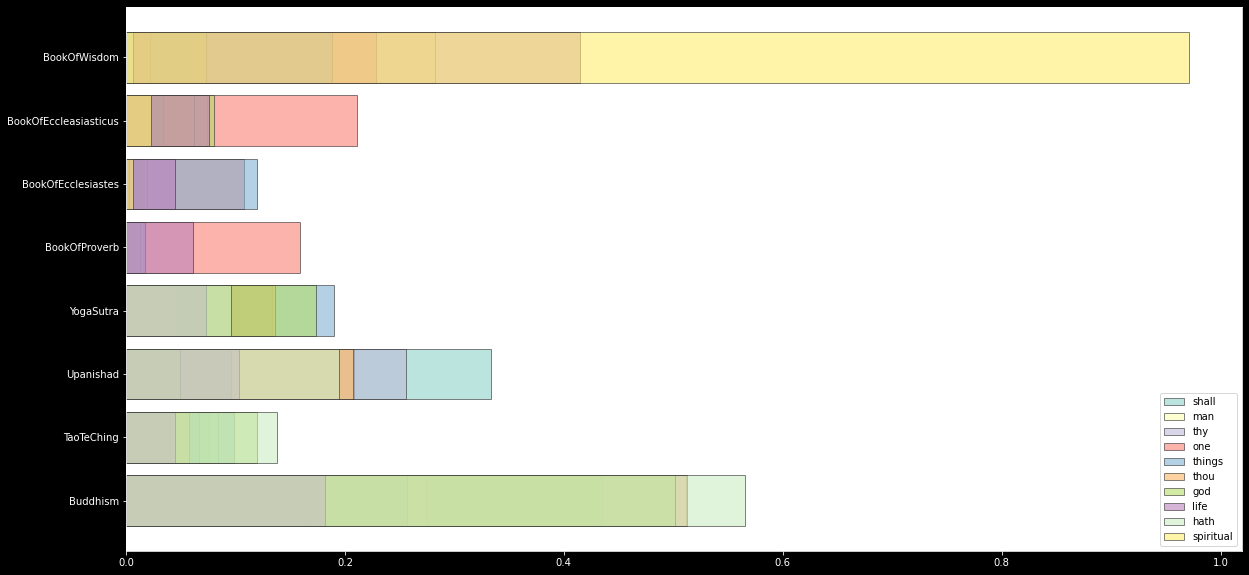

In [12]:
# check their skewness to see which metric is better
for word in top_words: 
    plt.barh(y = book_names, width = group_by_books[word]/group_by_books[word].sum(), alpha=0.6, label=word, edgecolor=".2")
plt.legend(loc='lower right')    
plt.show()

Think About the Chapter to Chapter difference of the word composition 
make a plot for that and investigate 

In [13]:
group_by_books['shall']/group_by_books['shall'].sum()

book
BookOfEccleasiasticus    0.434932
BookOfEcclesiastes       0.076199
BookOfProverb            0.333048
BookOfWisdom             0.102740
Buddhism                 0.000000
TaoTeChing               0.014555
Upanishad                0.008562
YogaSutra                0.029966
Name: shall, dtype: float64

Going a little more in depth 
* qualtify the difference/ similarity between books 
*...


Find the weight of each word within each book, and use it to compare how common trend between books 

In [14]:
weight_by_books = group_by_books.apply(lambda x: x/x.sum(), axis=1)
weight_by_books

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
book,,,,,,,,,,,,,,,,,,,,,
BookOfEccleasiasticus,0.000000,0.012742,0.000202,0.000067,0.000000,0.000944,0.000000,0.00000,0.000202,0.000000,...,0.000000,0.000000,0.000000,0.000067,0.000067,0.00000,0.000472,0.000000,0.000135,0.000000
BookOfEcclesiastes,0.000000,0.016601,0.000000,0.000000,0.000000,0.001804,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000361,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
BookOfProverb,0.000259,0.008424,0.000000,0.000000,0.000000,0.001426,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001037,0.000000,0.000130,0.000000
BookOfWisdom,0.000000,0.006367,0.000000,0.000000,0.000000,0.000199,0.000000,0.00000,0.000000,0.000199,...,0.000398,0.000000,0.000000,0.000000,0.000000,0.00000,0.001393,0.000000,0.000000,0.000000
Buddhism,0.000000,0.000000,0.000000,0.000000,0.002868,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001359,0.000000,0.000000,0.000000
TaoTeChing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000217,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Upanishad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000456,0.000152,0.00000,0.000152,0.000000,...,0.000000,0.000456,0.000000,0.000000,0.000000,0.00000,0.000304,0.000152,0.000000,0.000152
YogaSutra,0.000000,0.000161,0.000080,0.000000,0.000000,0.000000,0.000000,0.00008,0.000000,0.000000,...,0.000000,0.000000,0.000161,0.000000,0.000000,0.00008,0.001126,0.000322,0.000000,0.000080


using the table above, we can calculate the similarity between each book, and graph that as a heatmap

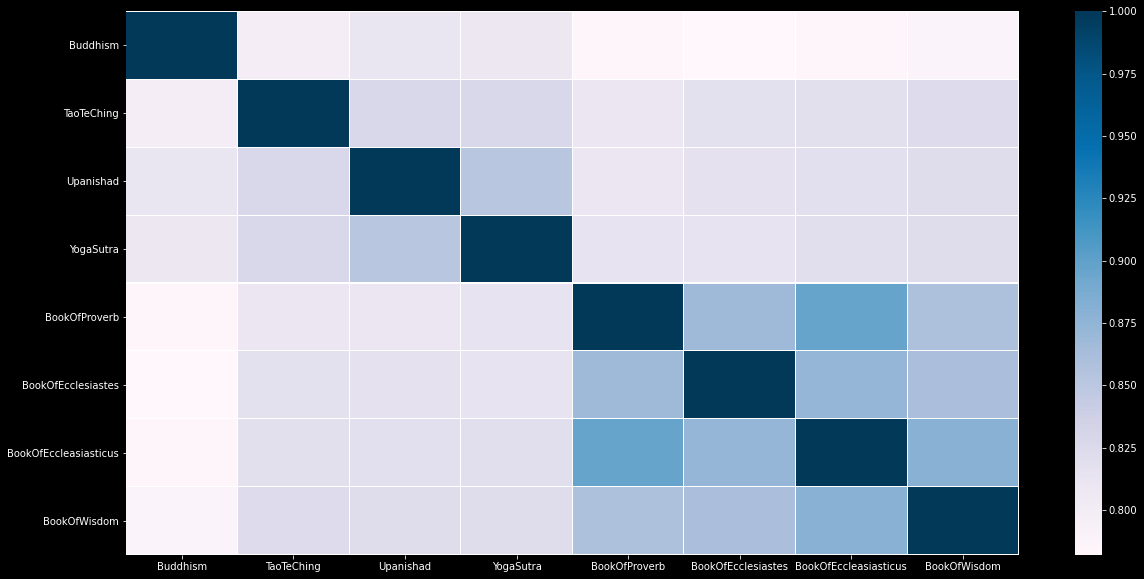

In [15]:
# compare the books in their composition 
def compare_word(df, b1, b2): 
    return 1-(df.loc[b1] - df.loc[b2]).abs().sum()/df.shape[0]

# def tfidf(df, b1, b2): 
#     return df.loc[b1] * (1 / (df.shape[1] / len(df.loc[b1][df.loc[b1] != 0])))

relationship = np.empty([8,8])
for i in range(len(book_names)): 
    for j in range(len(book_names)): 
        relationship[i, j] = compare_word(weight_by_books, book_names[i], book_names[j])

# build the heatmap 
ax = sns.heatmap(relationship, linewidths=.1, cmap='PuBu', xticklabels=book_names, yticklabels=book_names)

According to the heatmap, we see that other than the 3 books from the old testament 


NLTK and Scikit-learn Stuff

* My Goal: identify word composition as the corresponding book

In [16]:
import nltk
import pickle 

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer 
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn import metrics # test accuracy 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\book2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
with_chapter = train.groupby(['book', 'chapter']).sum()
with_chapter = train.groupby('book').sum()

words = with_chapter.columns
books = np.multiply(words+' ', with_chapter.values)

Research Text Classification to test similarity 